# BVAP and Membership in the Congressional Black Caucus

In this notebook, we explore the relationship between the Black Voting Age Population (BVAP) of a congressional district

Data on Citizen Voting Age Population is drawn from [the 2012-2016 American Community Survey 5 year Estimates](https://www.census.gov/programs-surveys/decennial-census/about/voting-rights/cvap.html). The relevant file, `CD.csv`, is included in this repository for convenience.

Data on Congressional Black Caucus membership (`cbc.csv`) was parsed from the [Wikipedia article](https://en.wikipedia.org/wiki/Congressional_Black_Caucus#Membership) for the Congressional Black Caucus (accessed 10/9/2018). We added Rep. John Conyers (who represented Michigan's 13th Congressional District until 2017) to the dataset to reflect the Caucus's membership after the 2016 election.

In [28]:
import pandas
import matplotlib.pyplot

In [2]:
df = pandas.read_csv("./raw/CD.csv")

In [26]:
bvap = df[df["LNNUMBER"] == 5][["GEOID", "CVAP_EST"]].set_index("GEOID")["CVAP_EST"]
total_cvap = df[df["LNNUMBER"] == 1][["GEOID", "CVAP_EST"]].set_index("GEOID")["CVAP_EST"]
total_pop = df[df["LNNUMBER"] == 1][["GEOID", "TOT_EST"]].set_index("GEOID")["TOT_EST"]
black_pop = df[df["LNNUMBER"] == 5][["GEOID", "TOT_EST"]].set_index("GEOID")["TOT_EST"]
display_name = df[df["LNNUMBER"] == 1][["GEOID", "GEONAME"]].set_index("GEOID")["GEONAME"]

tidy_df = pandas.DataFrame({
    "display_name": display_name,
    "bvap": bvap,
    "cvap": total_cvap,
    "bvap_pct": bvap / total_cvap,
    "black_pop": black_pop,
    "total_pop": total_pop,
    "black_pct": black_pop / total_pop
})

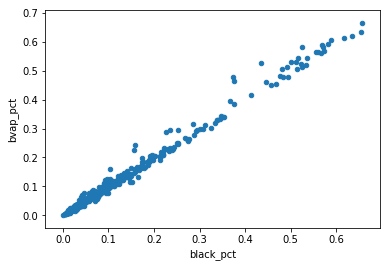

In [31]:
tidy_df.plot.scatter(x="black_pct", y="bvap_pct")

In [33]:
tidy_df.to_csv("./cvap.csv")

In [40]:
df = pandas.read_csv("./cbc.csv")

In [43]:
fips_to_state_name = {'01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas',
                      '06': 'California', '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware',
                      '11': 'District of Columbia', '12': 'Florida', '13': 'Georgia',
                      '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois', '18': 'Indiana',
                      '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana',
                      '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan',
                      '27': 'Minnesota', '28': 'Mississippi', '29': 'Missouri', '30': 'Montana',
                      '31': 'Nebraska', '32': 'Nevada', '33': 'New Hampshire', '34': 'New Jersey',
                      '35': 'New Mexico', '36': 'New York', '37': 'North Carolina',
                      '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon',
                      '42': 'Pennsylvania', '44': 'Rhode Island', '45': 'South Carolina',
                      '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas', '49': 'Utah',
                      '50': 'Vermont', '51': 'Virginia', '53': 'Washington', '54': 'West Virginia',
                      '55': 'Wisconsin', '56': 'Wyoming'}

state_name_to_fips = {value: key for key, value in fips_to_state_name.items()}

In [46]:
def parse_geoid(cd_value):
    split_string = cd_value.split("-")
    state = split_string[0].strip()
    fips = state_name_to_fips[state]
    district = split_string[-1][:-2].strip().zfill(2)
    return "50000US" + fips + district

df["GEOID"] = df["cd"].apply(parse_geoid)

In [48]:
df["GEOID"]

0     50000US3712
1     50000US0637
2     50000US3903
3     50000US1302
4     50000US1001
5     50000US2404
6     50000US3701
7     50000US1807
8     50000US3609
9     50000US2901
10    50000US2905
11    50000US4506
12    50000US2613
13    50000US2407
14    50000US1707
15    50000US1210
16    50000US2705
17    50000US4202
18    50000US3911
19    50000US4809
20    50000US1220
21    50000US4823
22    50000US3608
23    50000US4830
24    50000US1304
25    50000US1702
26    50000US2614
27    50000US1205
28    50000US0613
29    50000US4818
30    50000US1305
31    50000US4904
32    50000US5104
33    50000US3605
34    50000US5504
35    50000US3410
36    50000US2202
37    50000US1701
38    50000US5103
39    50000US1313
40    50000US0107
41    50000US2802
42    50000US4833
43    50000US0643
44    50000US3412
45    50000US1224
Name: GEOID, dtype: object